# Transfer Learning Image Classification
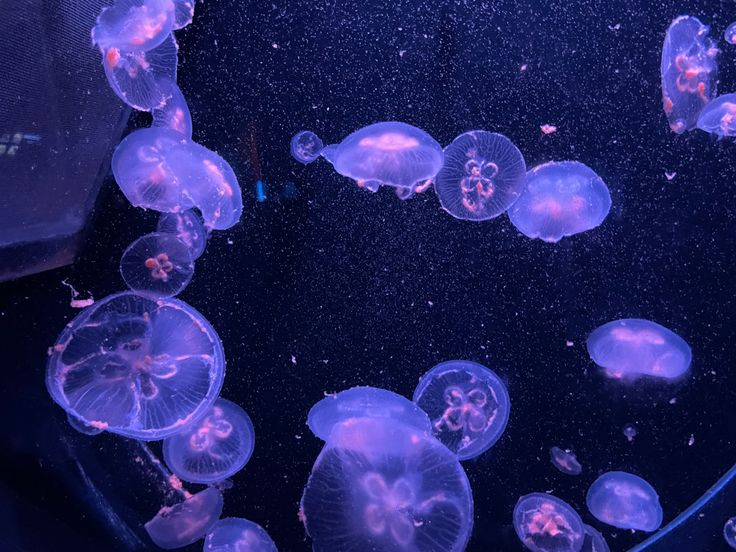

Pada sesi coding kali ini, kita akan mempraktikan penggunaan transfer learning untuk Image Classification Jelly Fish. Kita akan membuat Deep Learning agar dapat membedakan tipe tipe antara gambar jelly fish menggunakan pretrained model

## 1. Download dan Unzip Dataset

In [ ]:
import os
import zipfile

# unzip dataset yang masih berbentuk file zip
zip_ref = zipfile.ZipFile("jellyfish_types.zip", 'r')
zip_ref.extractall("./")
zip_ref.close()

In [ ]:
# menentukan path dari dataset untuk training dan dataset untuk validasi
train_dir = '/content/Train_Test_Valid/Train'
validation_dir = '/content/Train_Test_Valid/test'

train_data_moon = os.listdir(train_dir + '/Moon_jellyfish/')
train_data_barrel = os.listdir(train_dir + '/barrel_jellyfish/')
train_data_blue = os.listdir(train_dir + '/blue_jellyfish')
train_data_compass = os.listdir(train_dir + '/compass_jellyfish')
train_data_lions = os.listdir(train_dir + '/lions_mane_jellyfish')
train_data_mauve = os.listdir(train_dir + '/mauve_stinger_jellyfish')

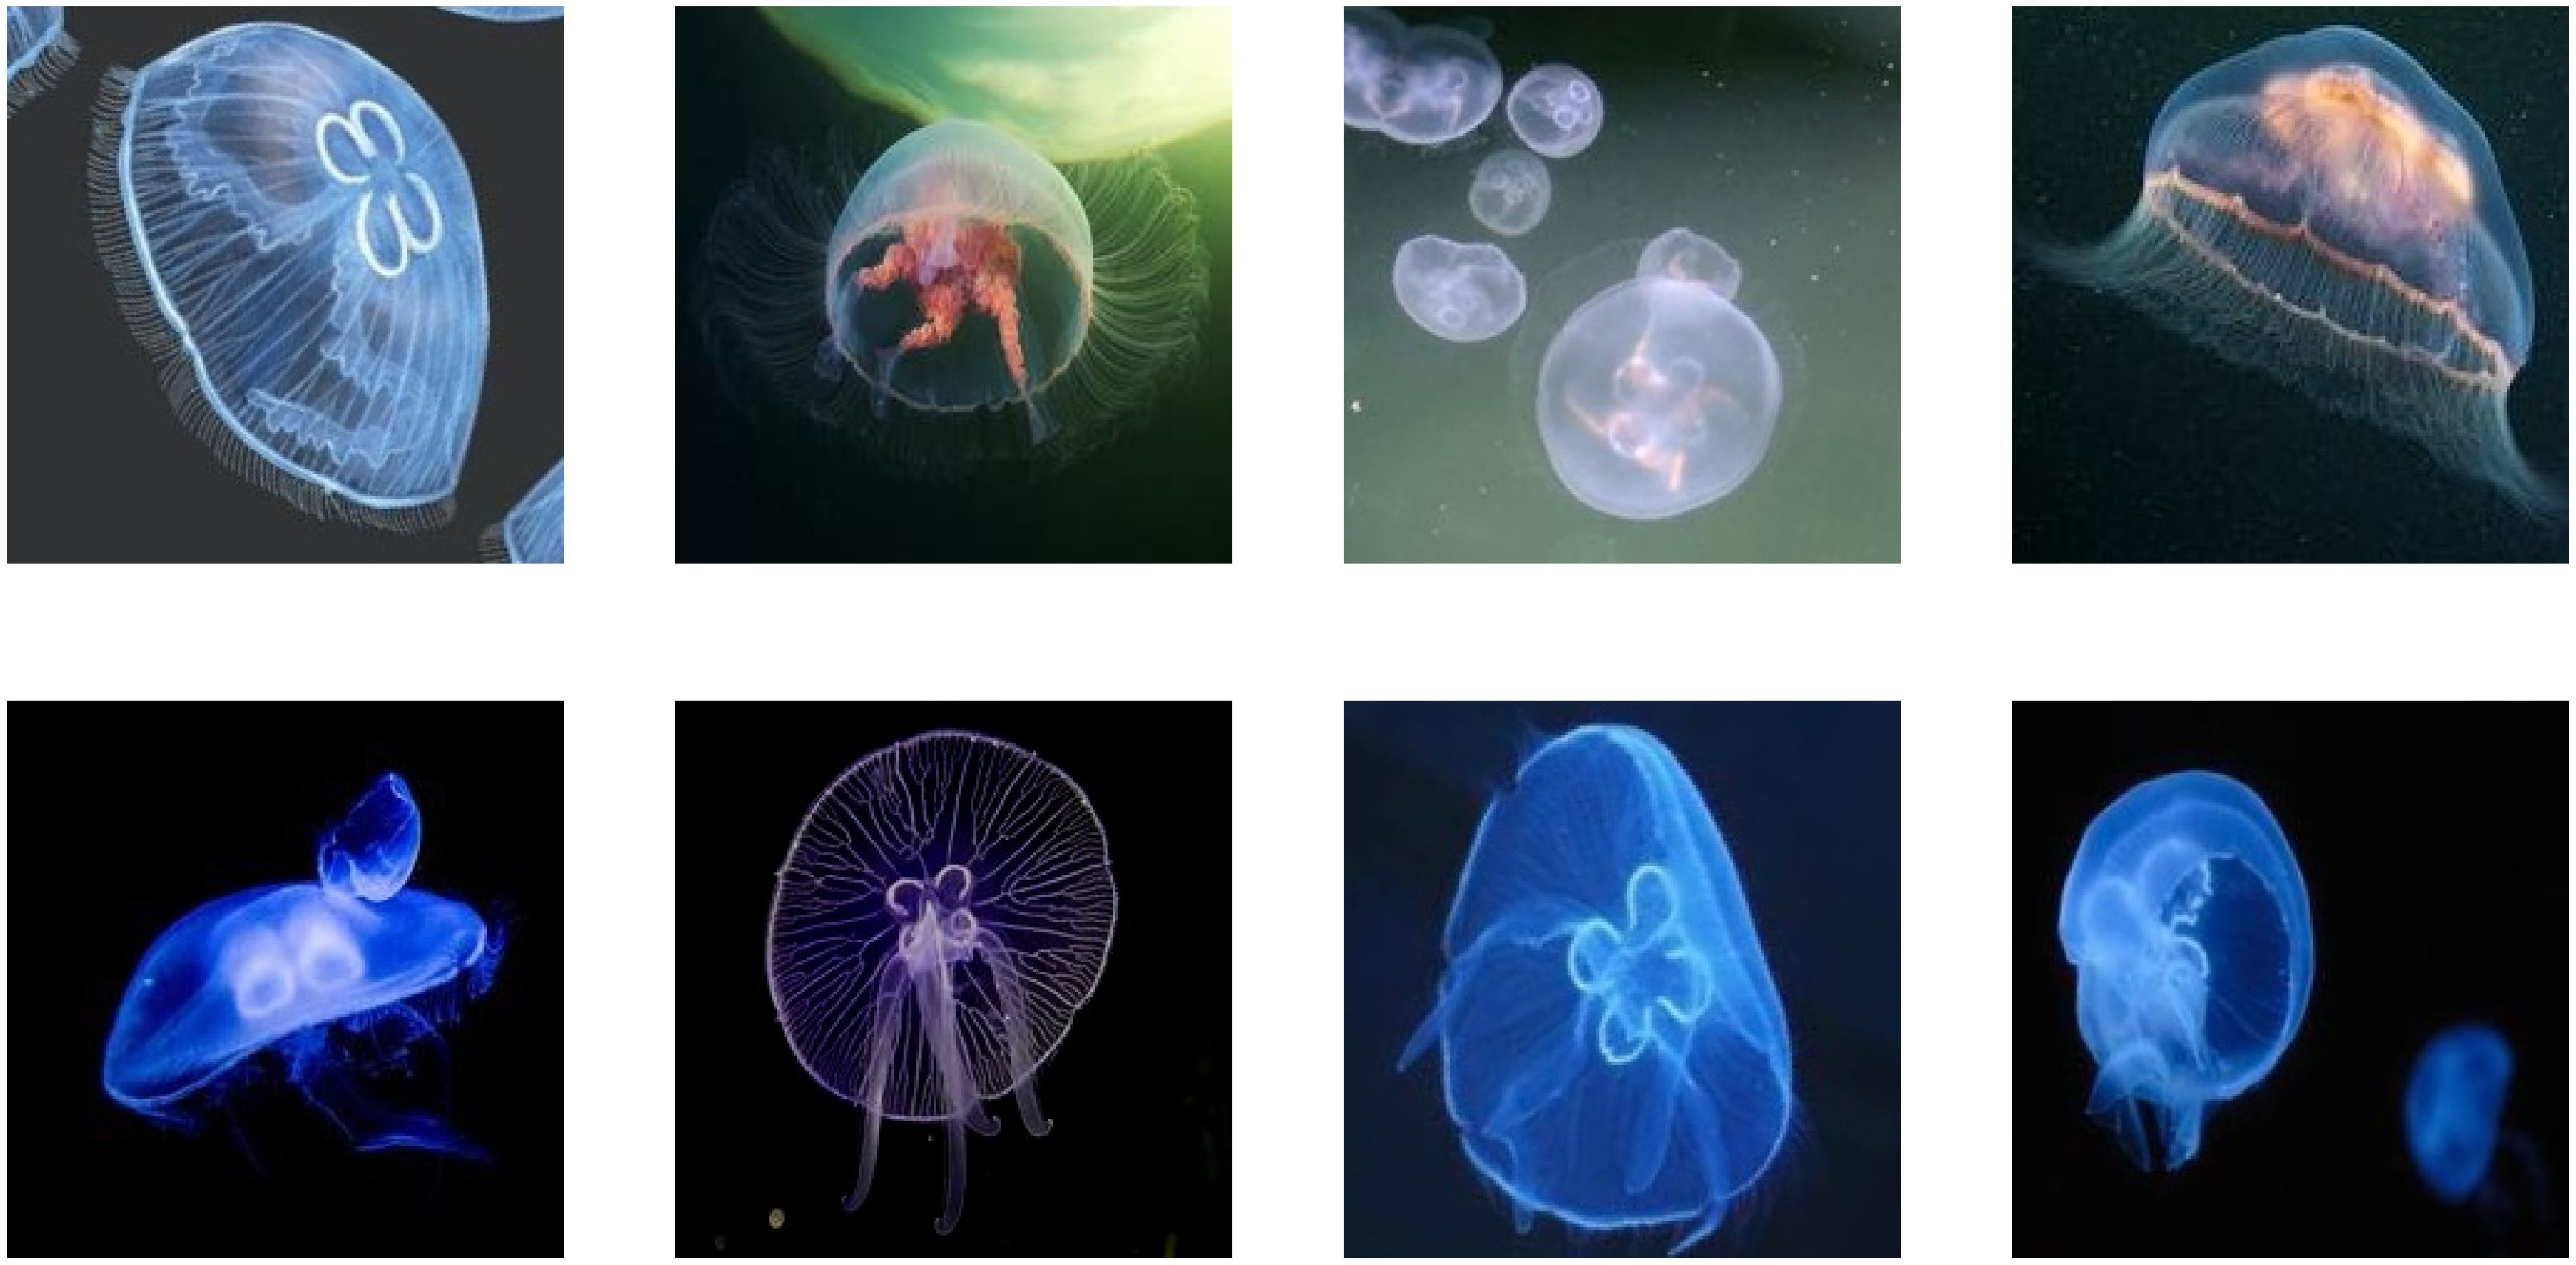

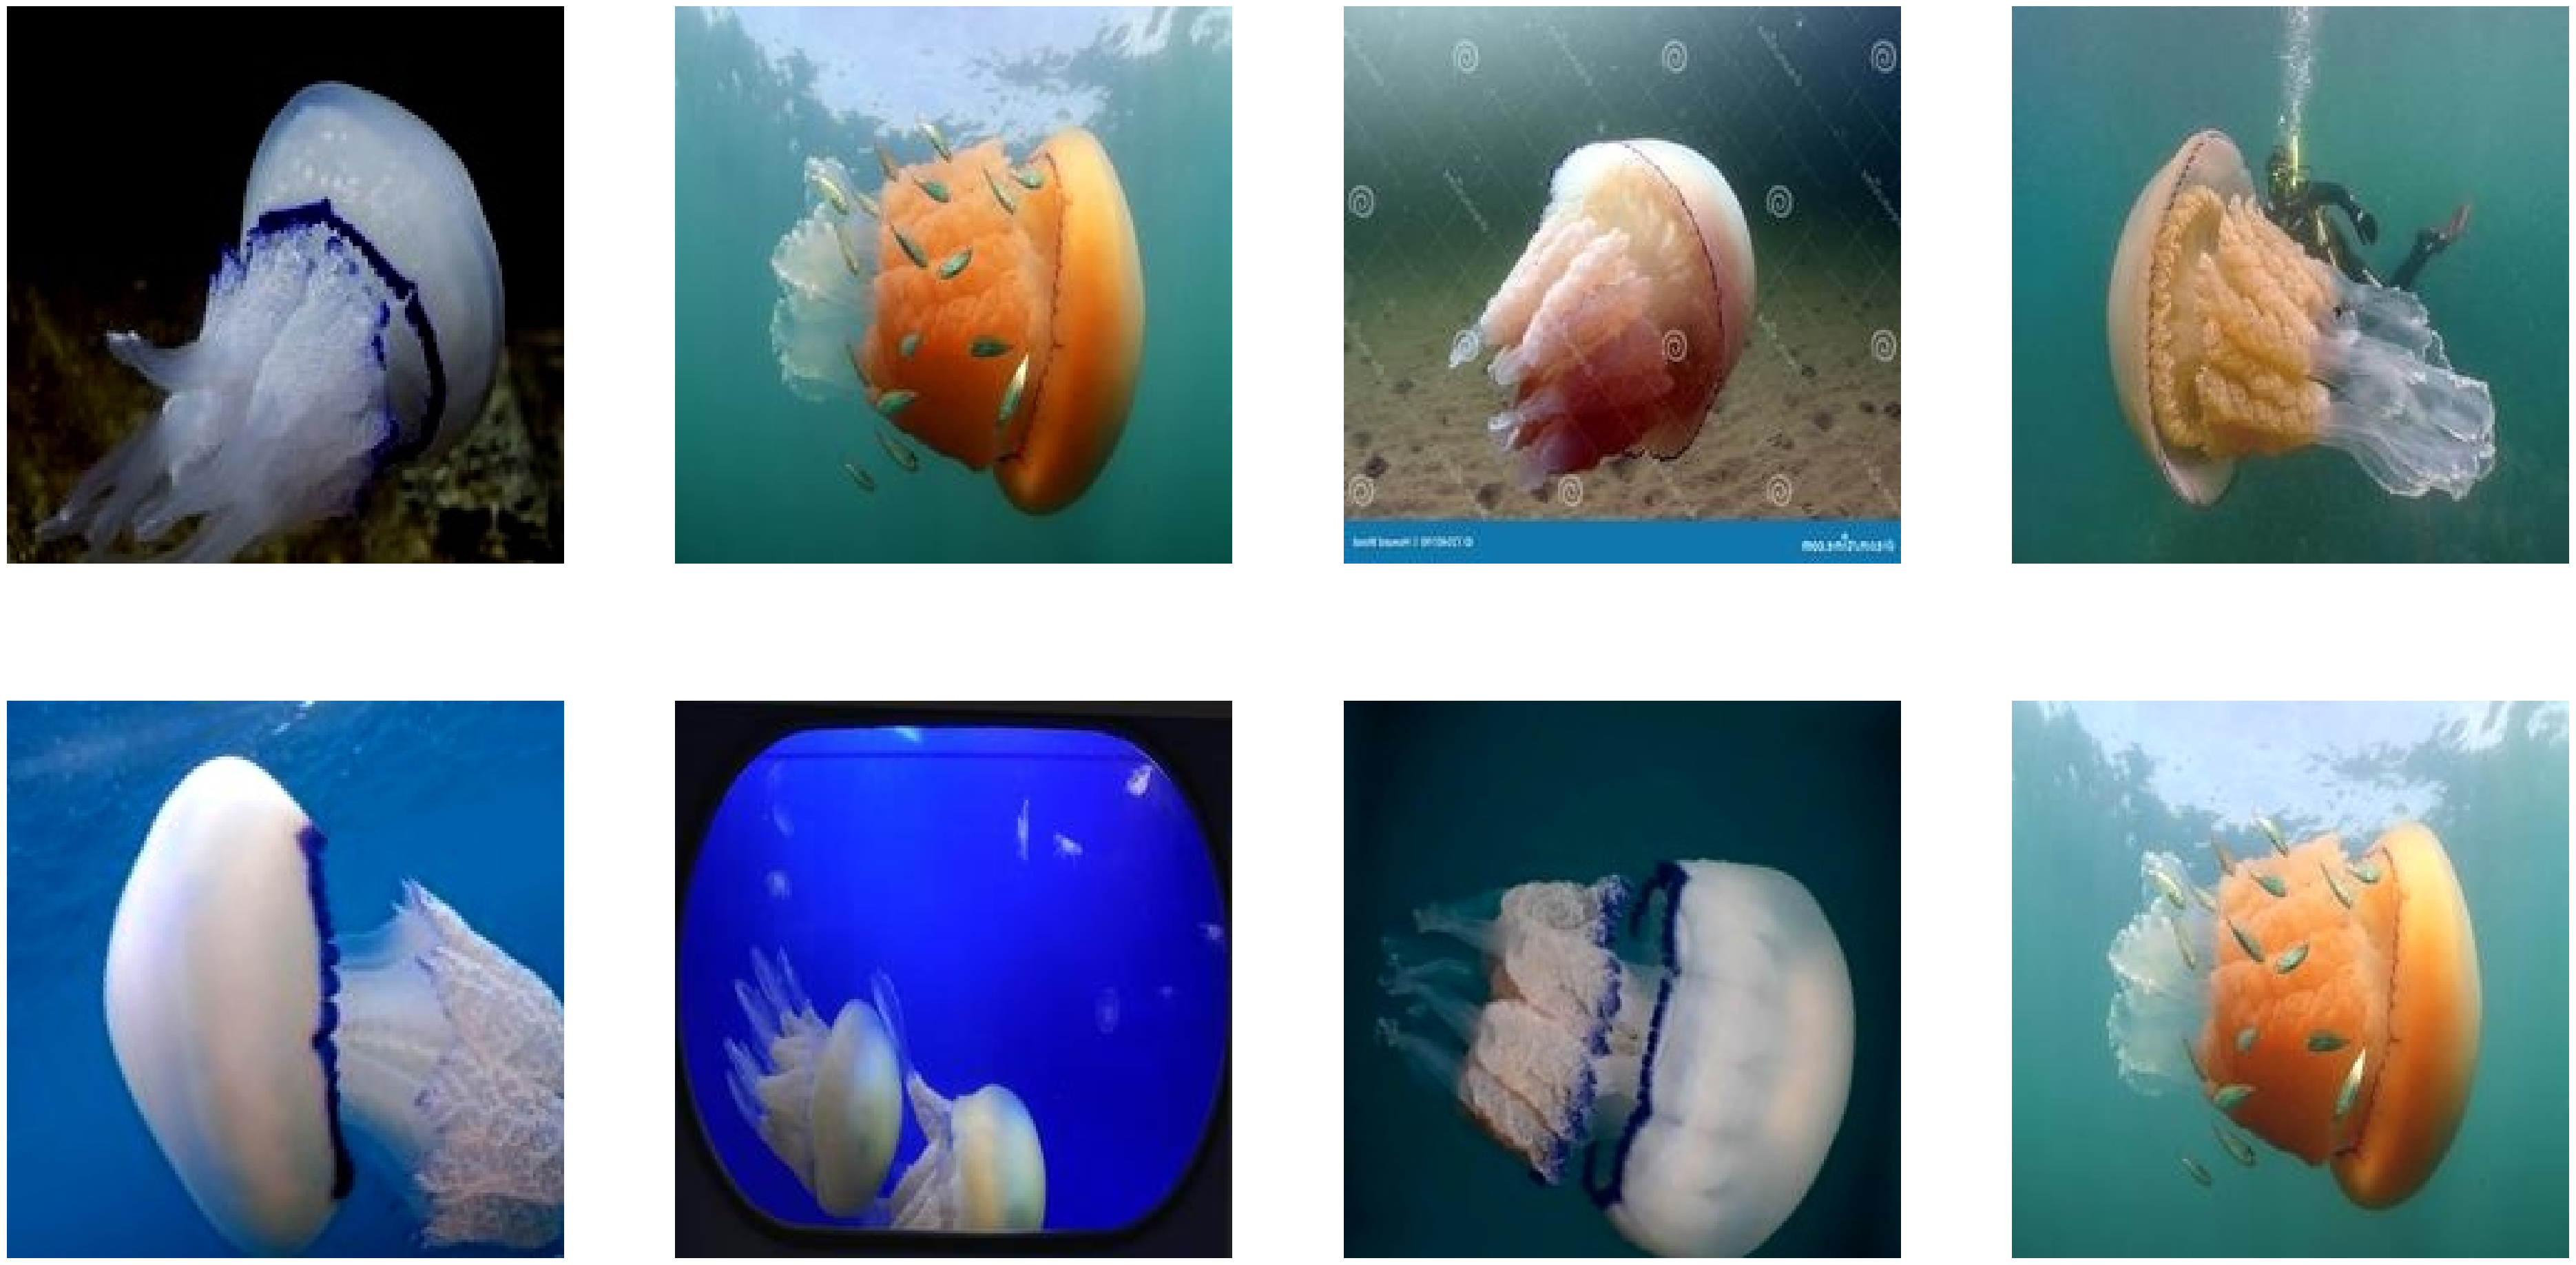

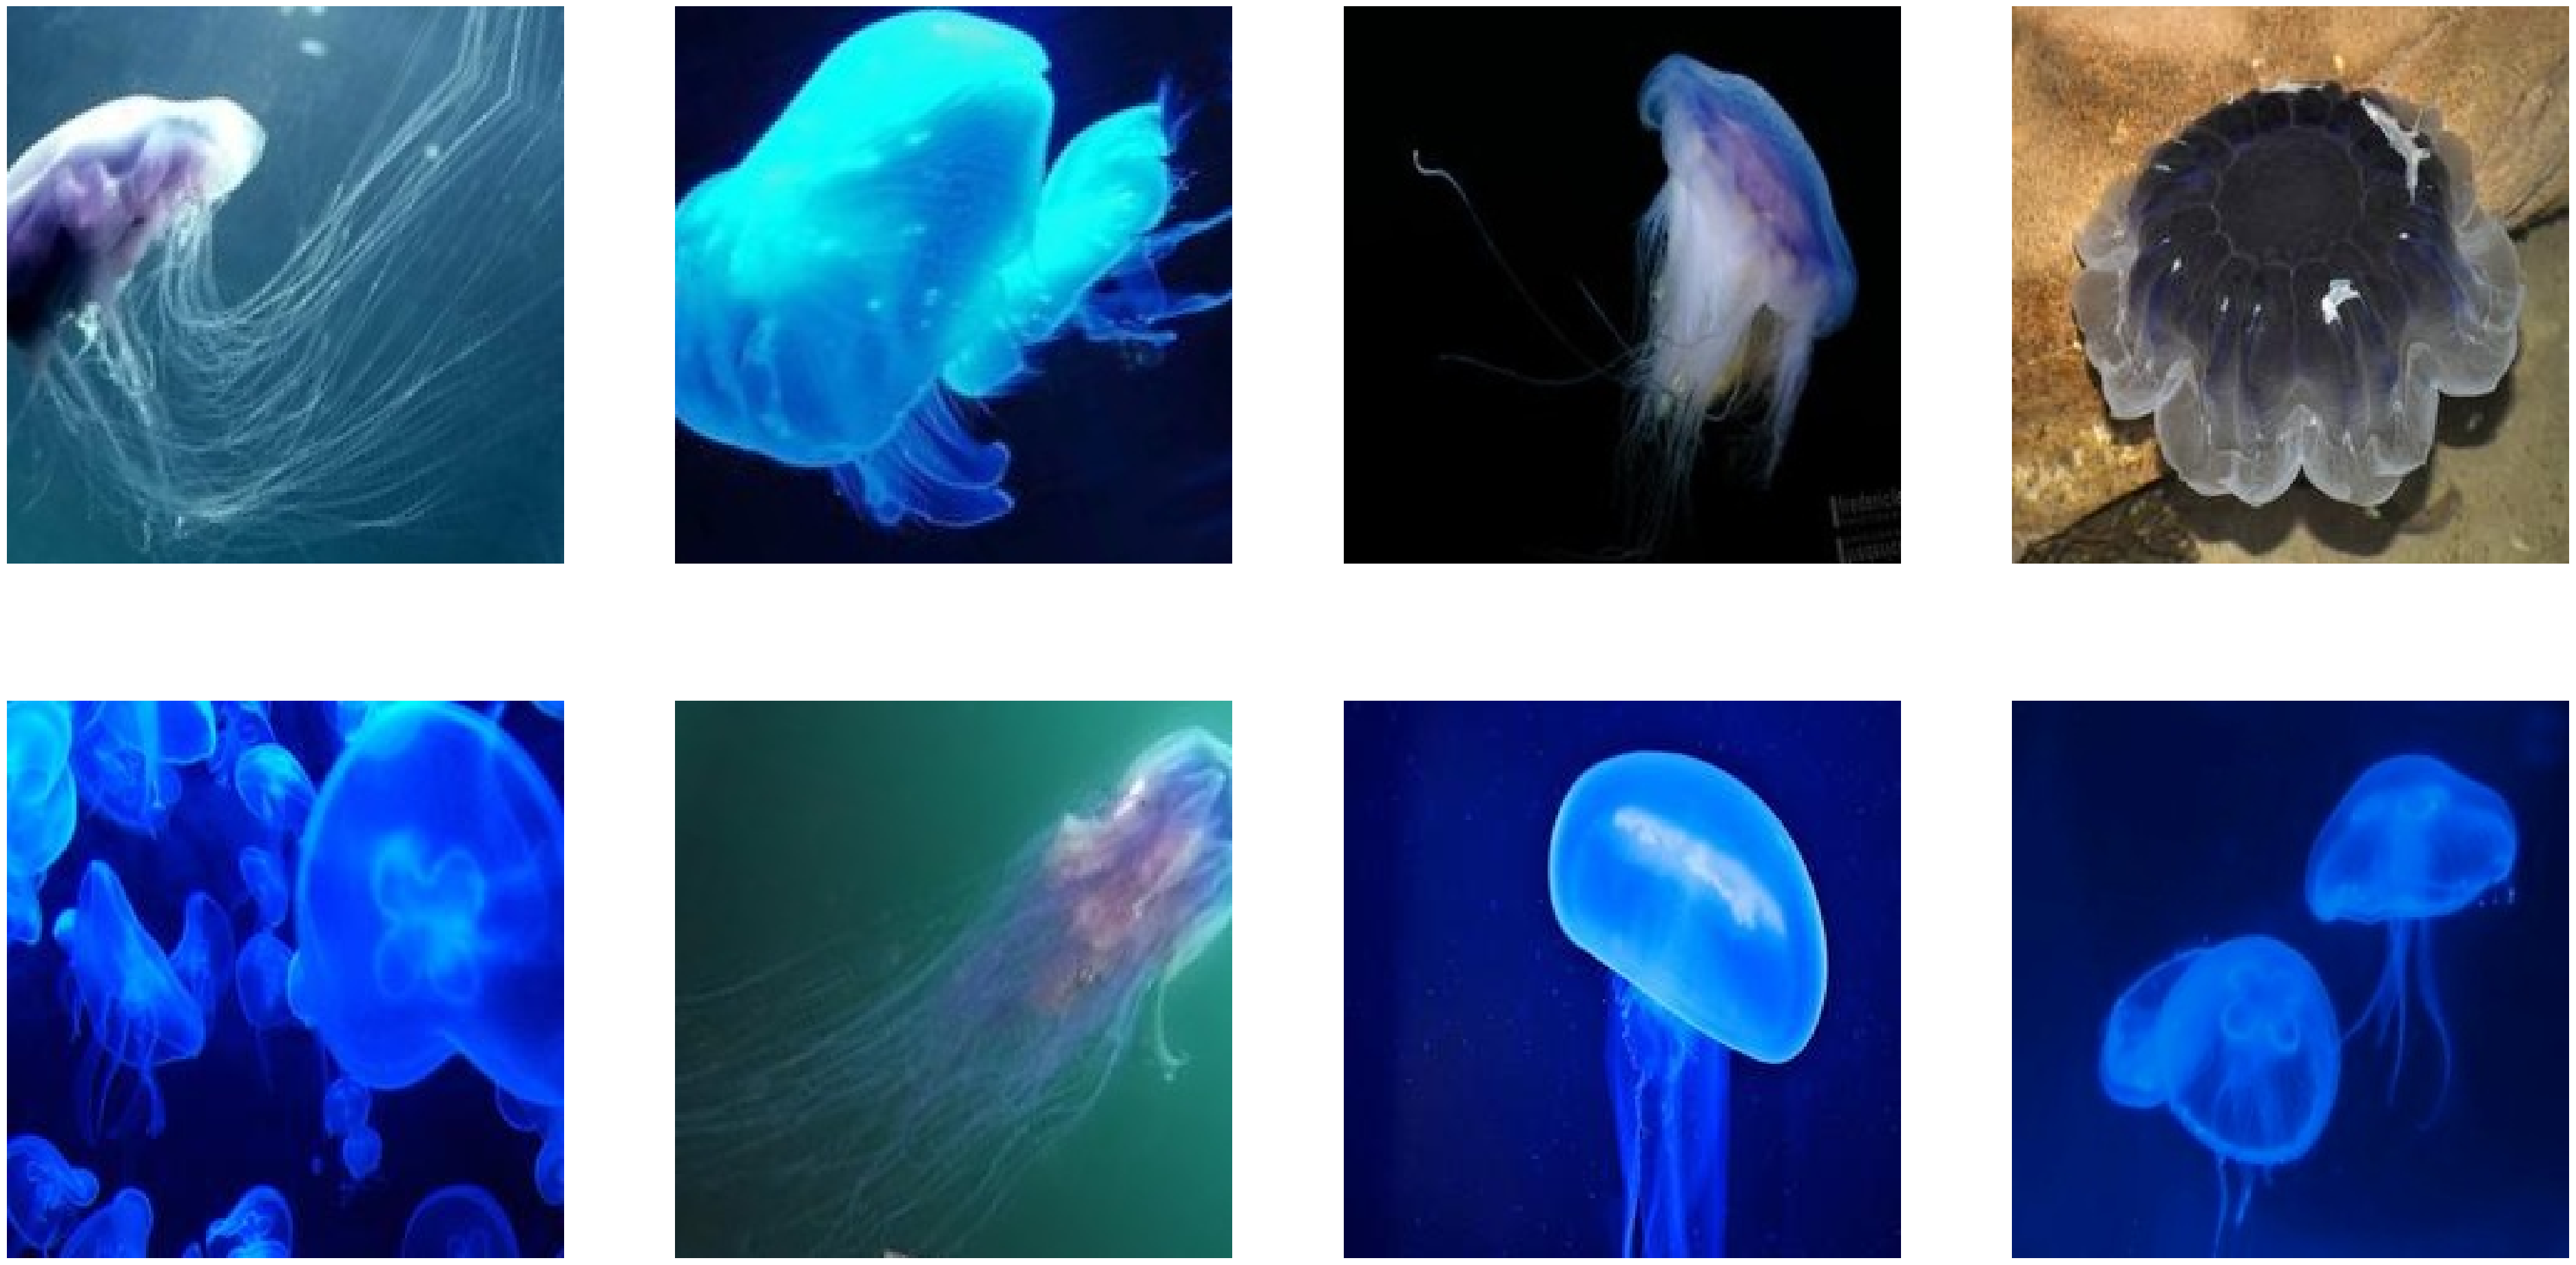

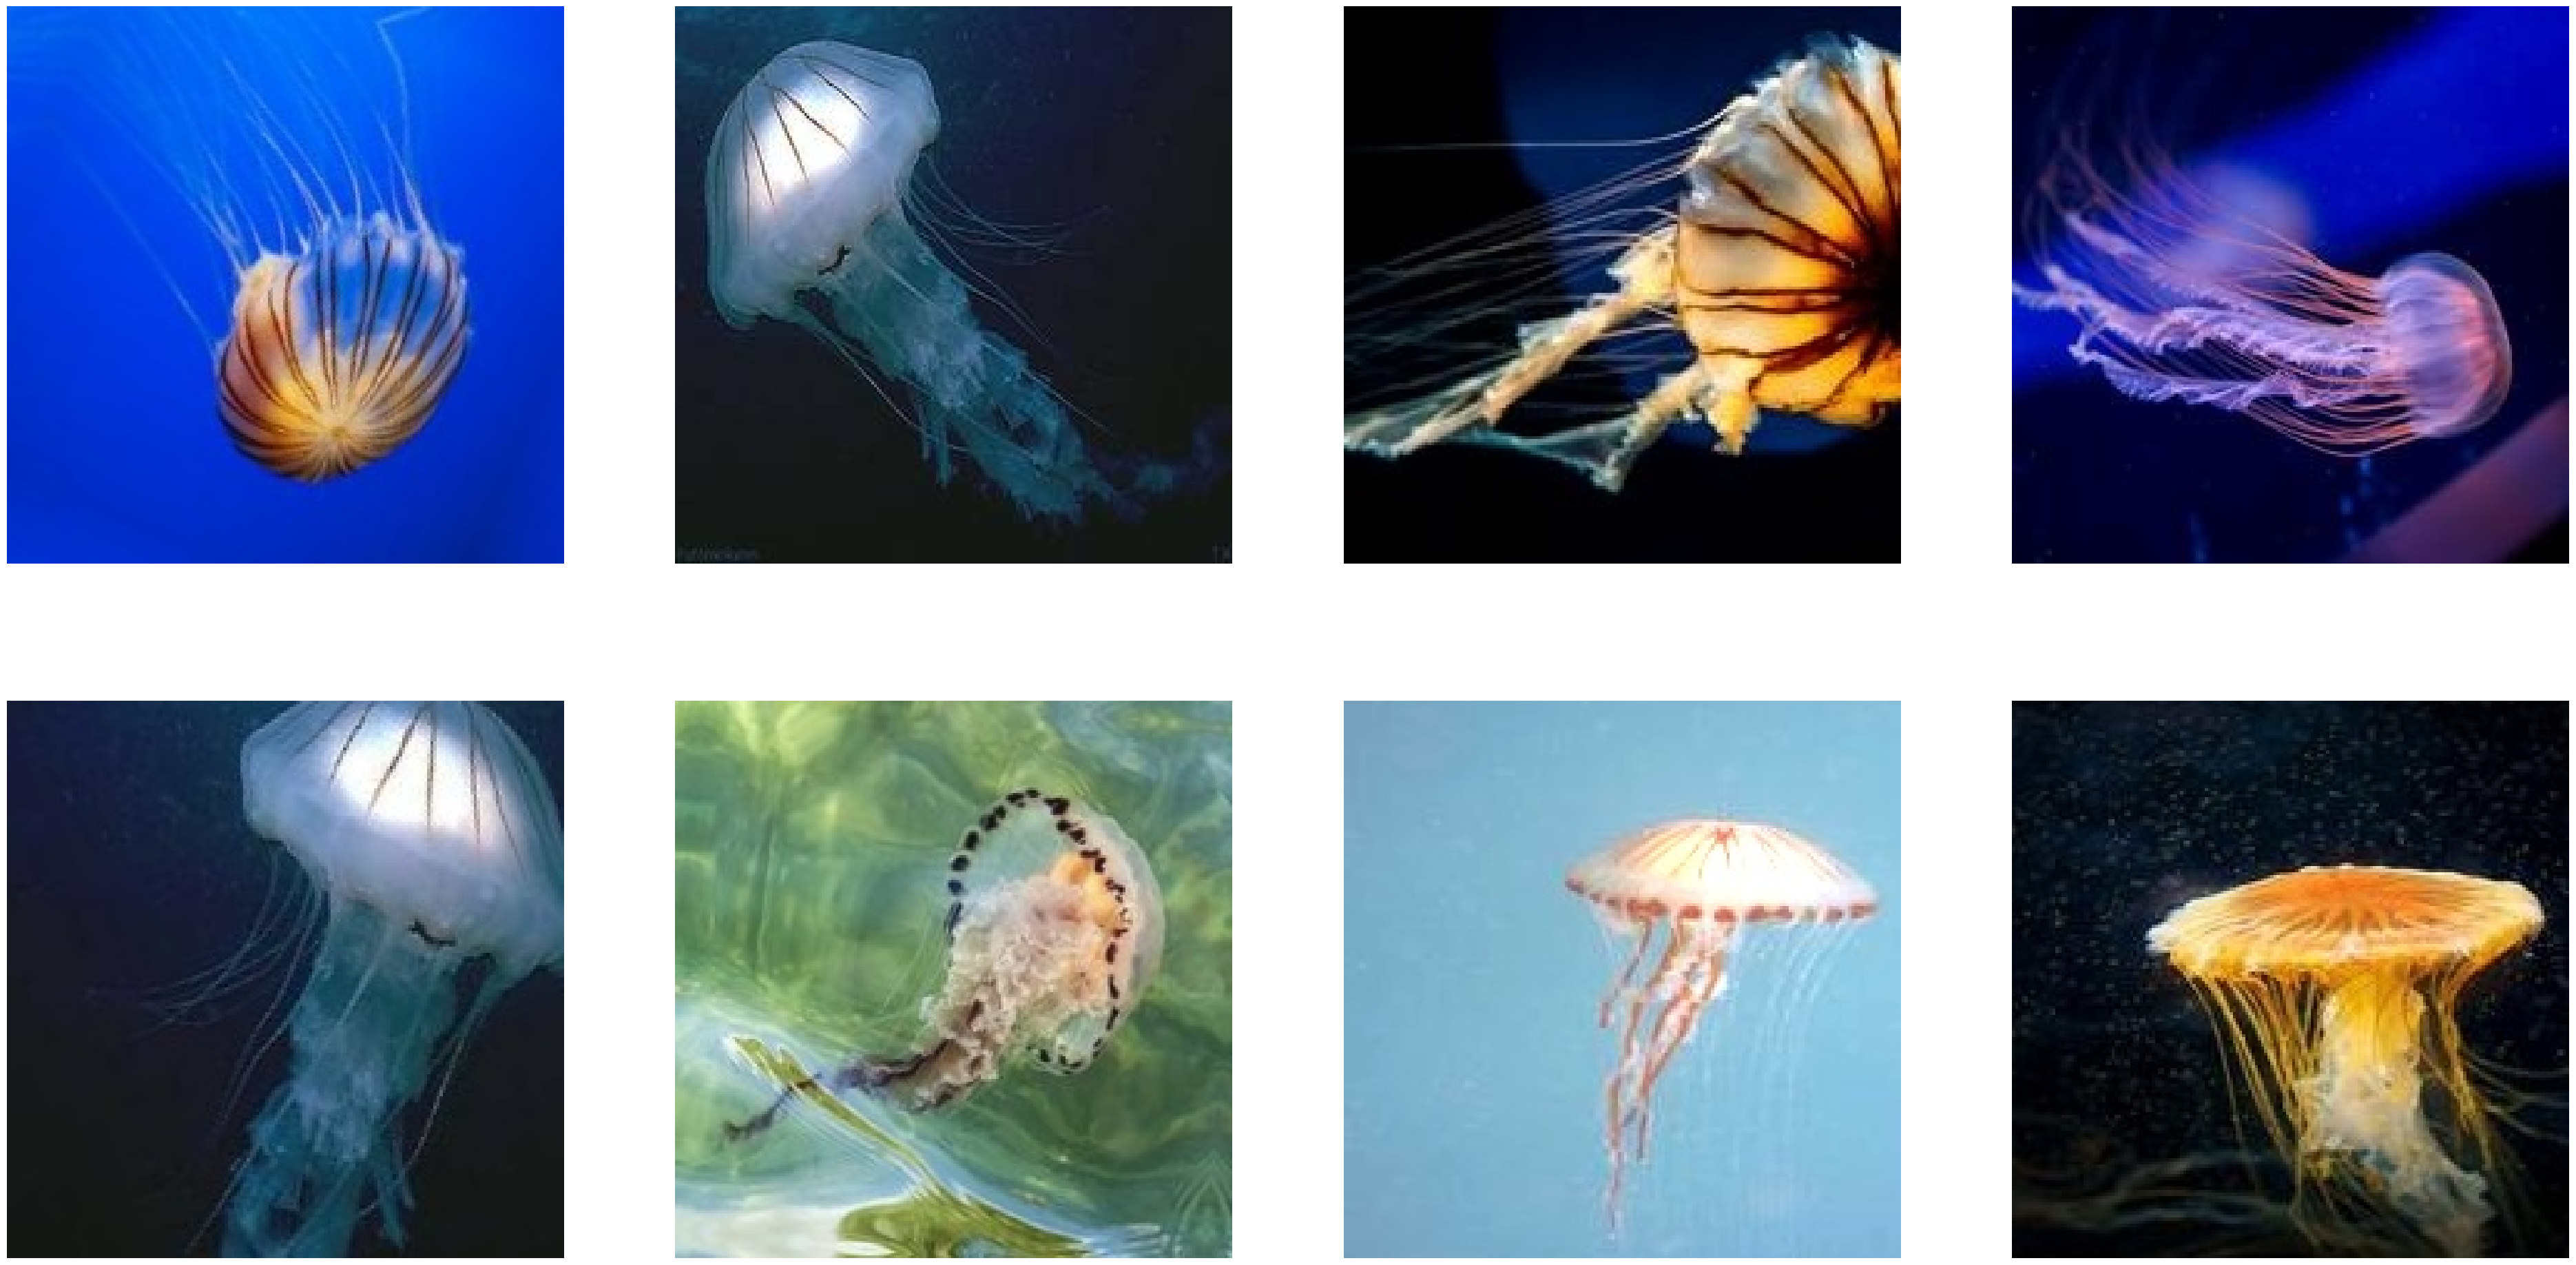

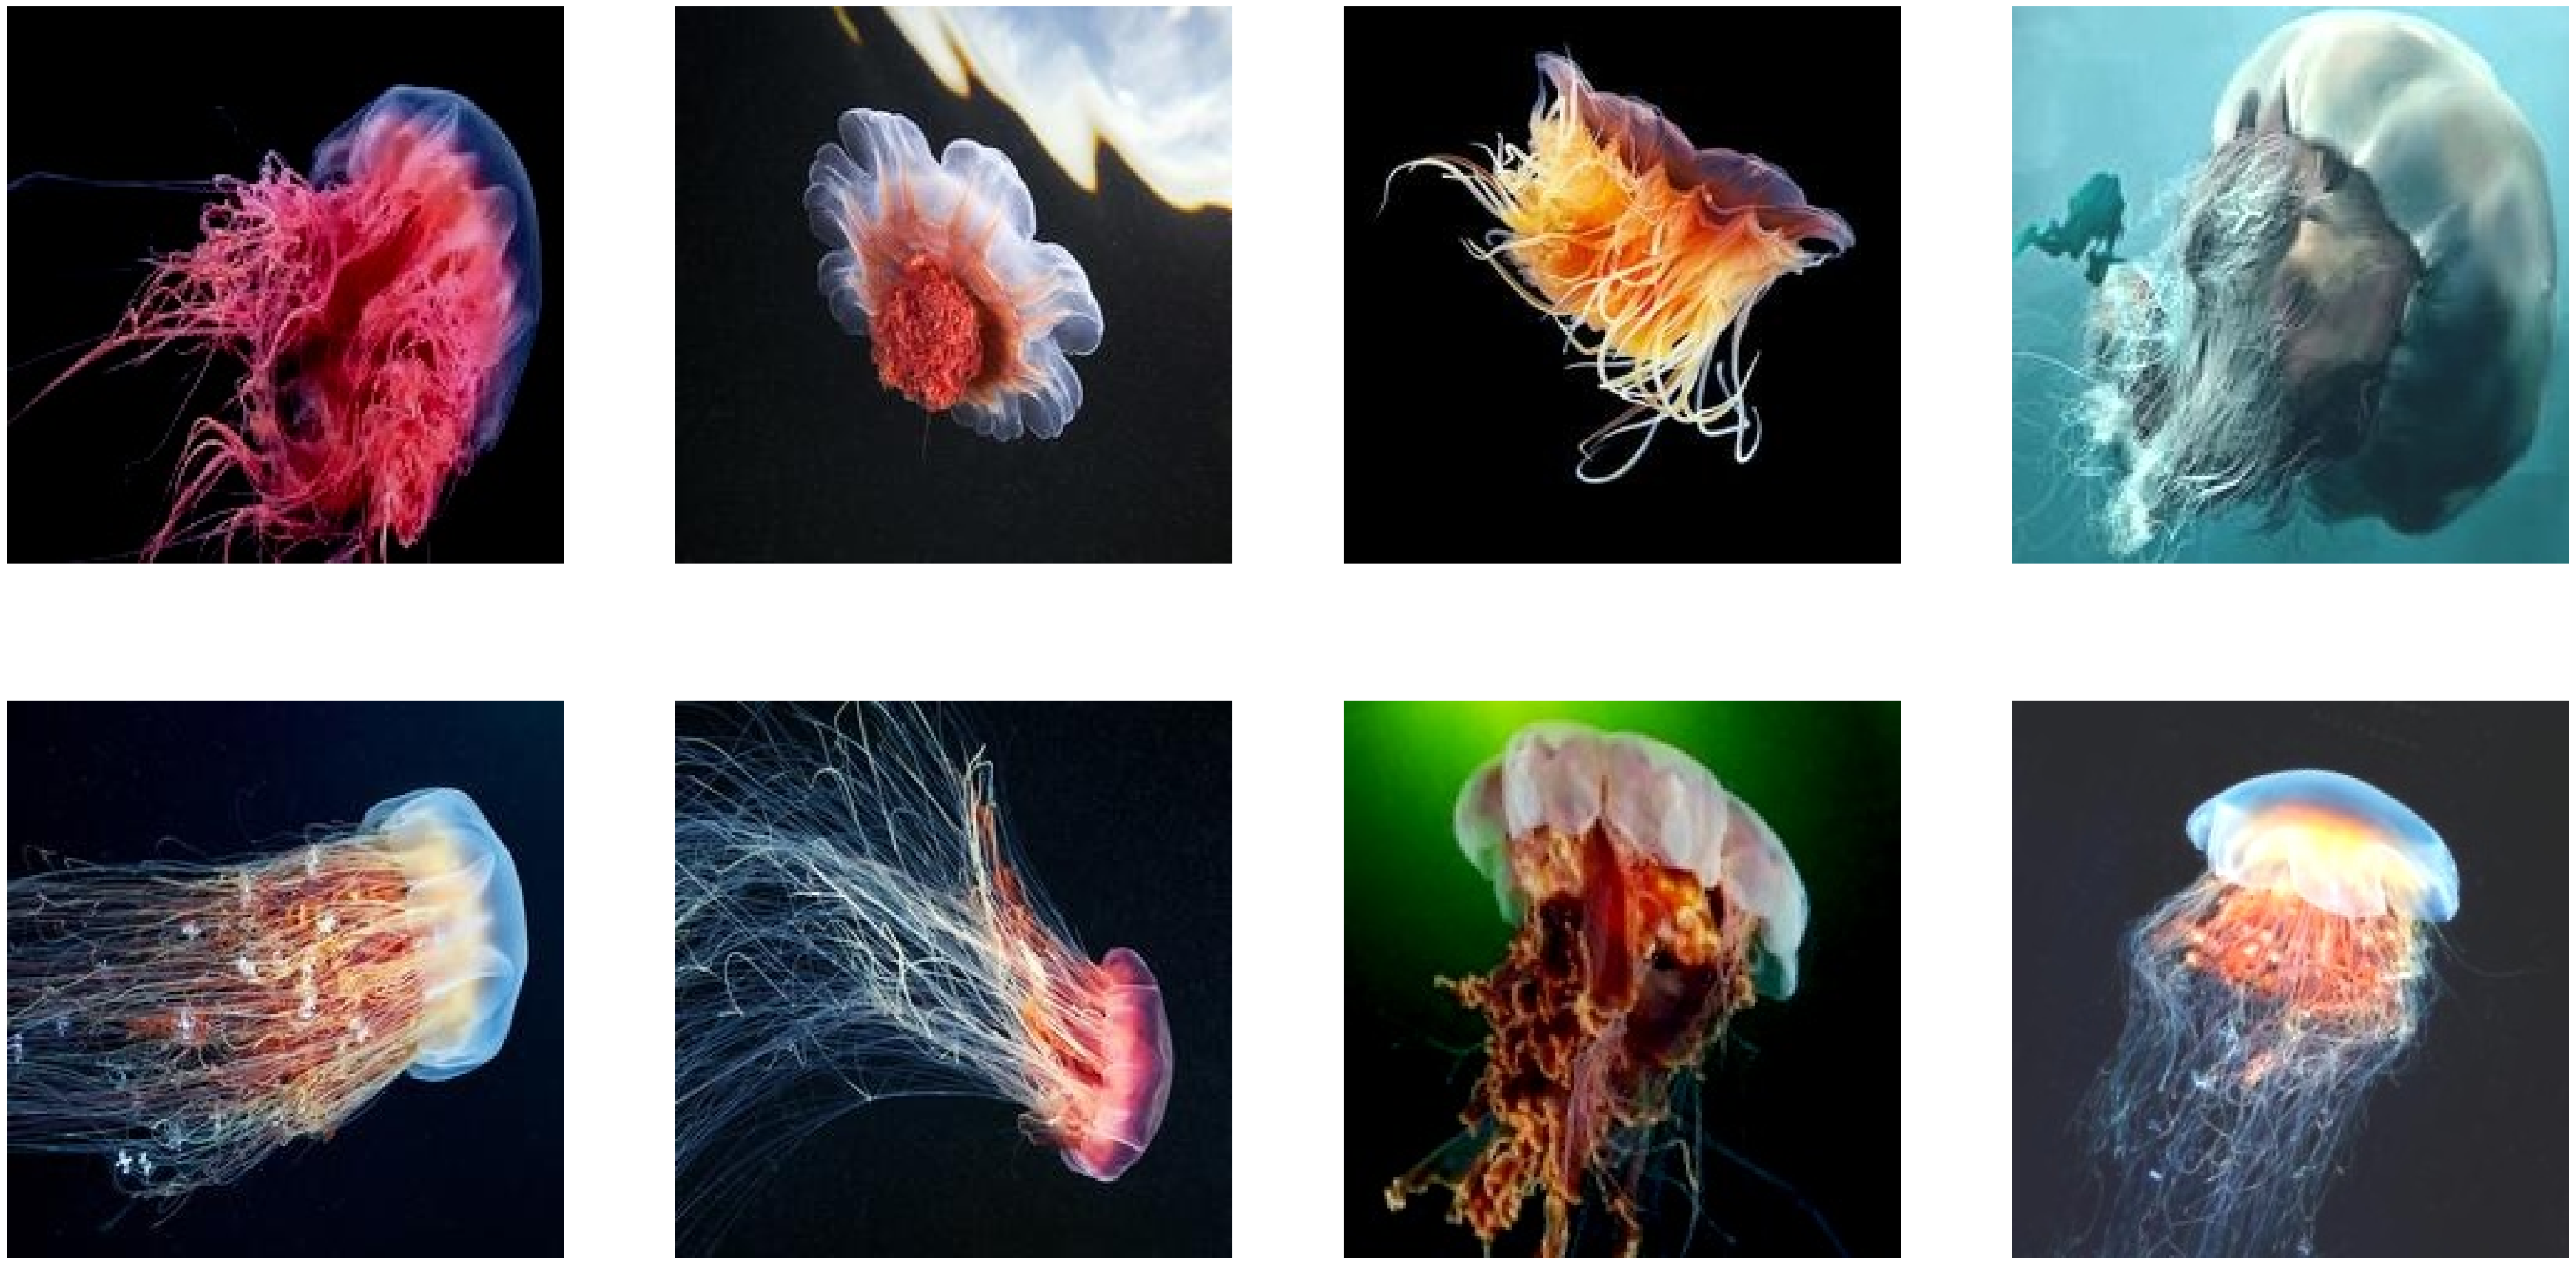

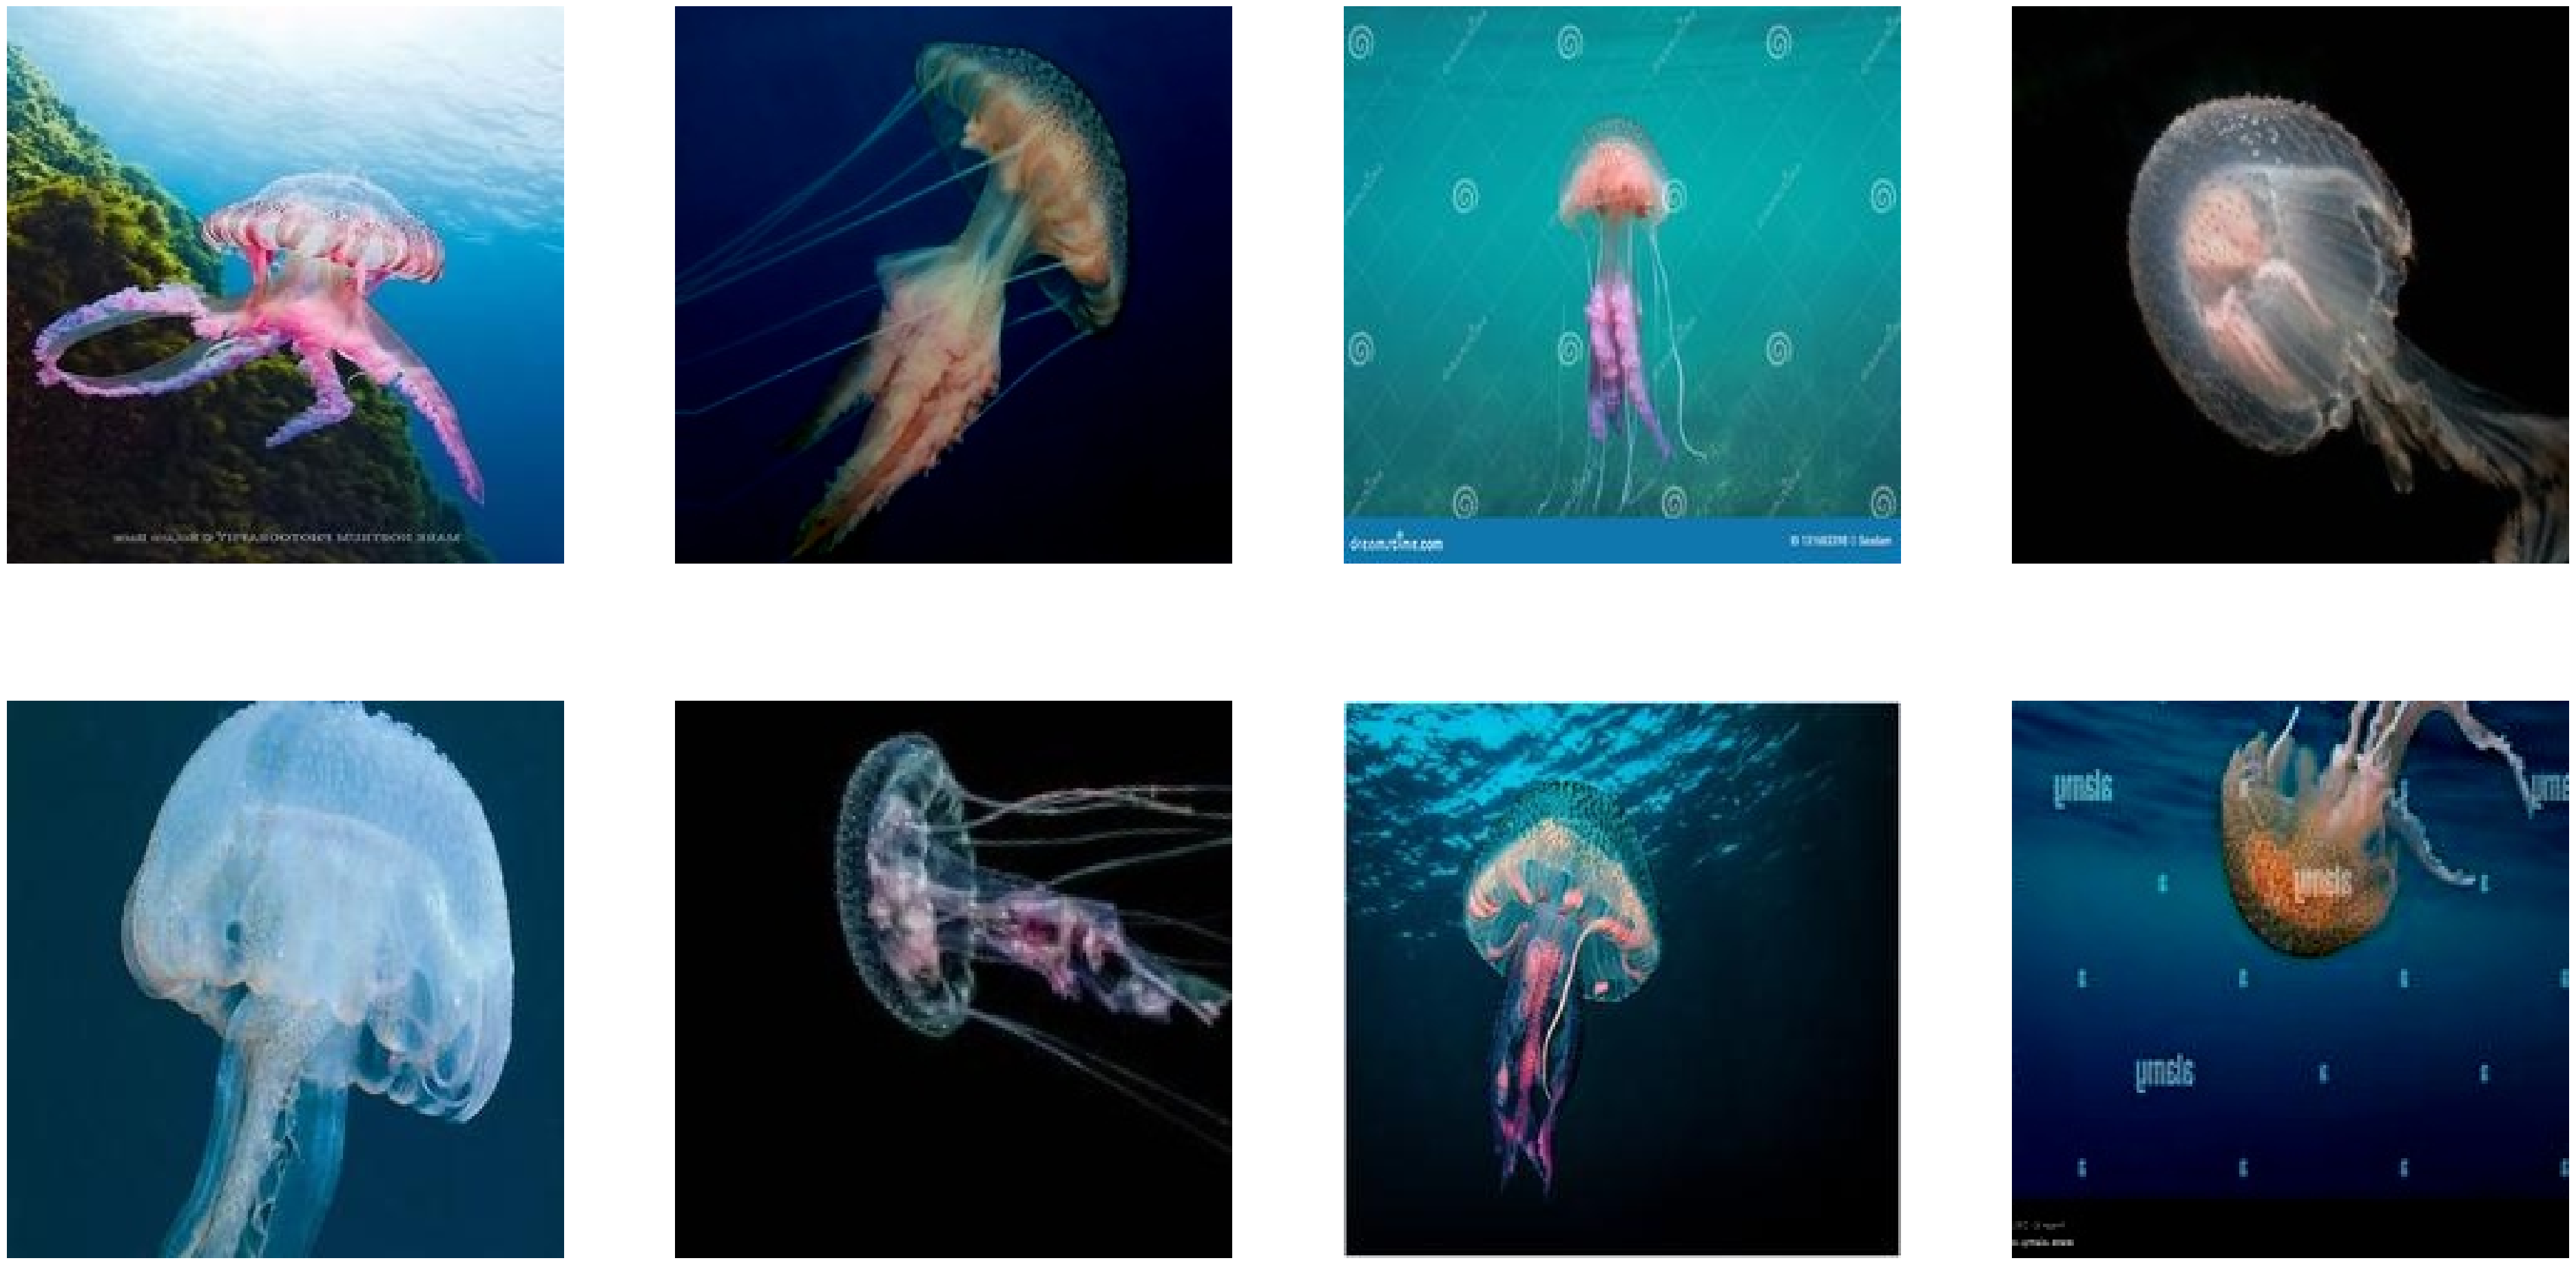

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 12x12 configuration
nrows = 12
ncols = 12

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 2)

next_moon_pic = train_data_moon[:8]
next_barrel_pic = train_data_barrel[:8]
next_blue_pic = train_data_blue[:8]
next_compass_pic = train_data_compass[:8]
next_lions_pic = train_data_lions[:8]
next_mauve_pic = train_data_mauve[:8]

for i, img_path in enumerate(next_moon_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(2, 4, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(train_dir + '/Moon_jellyfish/' + img_path)
  plt.imshow(img)
plt.show()

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 2)

for i, img_path in enumerate(next_barrel_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(2, 4, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(train_dir + '/barrel_jellyfish/' + img_path)
  plt.imshow(img)
plt.show()

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 2)

for i, img_path in enumerate(next_blue_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(2, 4, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(train_dir + '/blue_jellyfish/' + img_path)
  plt.imshow(img)
plt.show()

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 2)

for i, img_path in enumerate(next_compass_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(2, 4, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(train_dir + '/compass_jellyfish/' + img_path)
  plt.imshow(img)
plt.show()

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 2)

for i, img_path in enumerate(next_lions_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(2, 4, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(train_dir + '/lions_mane_jellyfish/' + img_path)
  plt.imshow(img)
plt.show()

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 2)

for i, img_path in enumerate(next_mauve_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(2, 4, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(train_dir + '/mauve_stinger_jellyfish/' + img_path)
  plt.imshow(img)
plt.show()

# 2. Preprocessing Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# melakukan image augmentation pada dataset untuk menambah variasi data
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)
                                   #dtype=tf.float32

test_datagen = ImageDataGenerator( rescale = 1.0/255.,)
                                   #dtype=tf.float32)

# melakukan data generator untuk membaca dataset training di setiap label
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 90,
                                                    class_mode = 'categorical',
                                                    target_size = (224, 224))

# # melakukan data generator untuk membaca dataset testing di setiap label
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 4,
                                                          class_mode  = 'categorical',
                                                          target_size = (224, 224))

Found 900 images belonging to 6 classes.
Found 40 images belonging to 6 classes.


## 3. Modeling

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.utils import plot_model

In [ ]:
#@title Pilih Pretrained Model :  { display-mode: "both" }
Model = "ResNet" #@param ["VGG16", "MobileNet", "InceptionNet", "ResNet"]

# Pilihan pretrained model yang dapat digunakan di sesi ini
if Model == "VGG16":
  base_model = VGG16(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = 'imagenet')

elif Model == "ResNet50":
  base_model = ResNet50(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = 'imagenet')

elif Model == "MobileNet":
  base_model = MobileNet(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = 'imagenet')

else:
  base_model = InceptionV3(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = 'imagenet'
)

print("Anda akan menggunakan model : ", Model)

# membuat base model tidak diikutkan proses training
for layer in base_model.layers:
  layer.trainable = False

87910968/87910968 [==============================] - 1s 0us/step
Anda akan menggunakan model :  ResNet


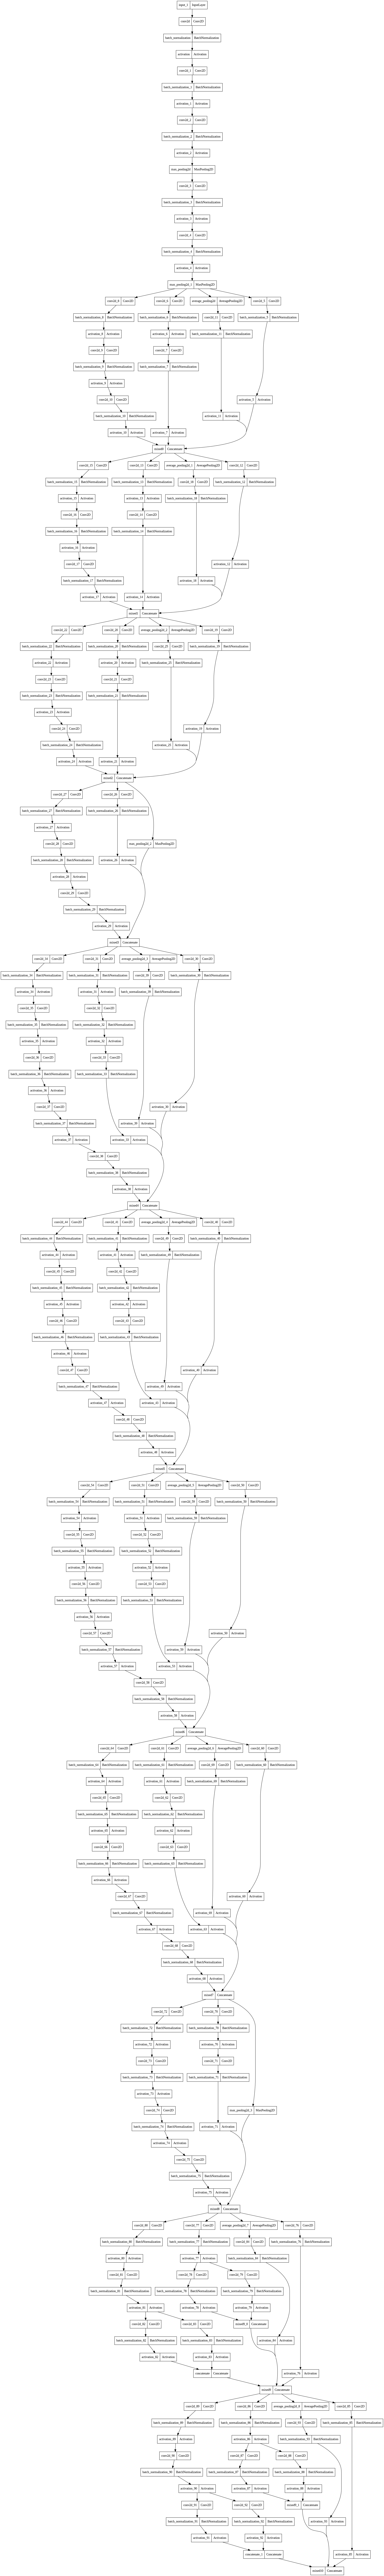

In [ ]:
# membuat visualisasi plot arsetektur yang telah kita pilih
plot_model(base_model, to_file='my_base_model.png')

In [ ]:
# kita juga bisa menggunakan .summary() untuk menampilkan arsitektur kita
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

In [ ]:
import tensorflow as tf


x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dropout(0.15)(x)
outputs = tf.keras.layers.Dense(6, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_generator, validation_data=validation_generator,
                    steps_per_epoch = 10, epochs = 40)

Epoch 1/20
10/10 [==============================] - 34s 1s/step - loss: 1.6990 - accuracy: 0.2822 - val_loss: 1.3315 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 15s 1s/step - loss: 1.2739 - accuracy: 0.5333 - val_loss: 1.0968 - val_accuracy: 0.6000
Epoch 3/20
10/10 [==============================] - 14s 1s/step - loss: 1.0264 - accuracy: 0.6400 - val_loss: 0.8416 - val_accuracy: 0.7000
Epoch 4/20
10/10 [==============================] - 14s 1s/step - loss: 0.8532 - accuracy: 0.7056 - val_loss: 0.6492 - val_accuracy: 0.8250
Epoch 5/20
10/10 [==============================] - 14s 1s/step - loss: 0.7416 - accuracy: 0.7389 - val_loss: 0.6175 - val_accuracy: 0.8500
Epoch 6/20
10/10 [==============================] - 14s 1s/step - loss: 0.6740 - accuracy: 0.7511 - val_loss: 0.6628 - val_accuracy: 0.7500
Epoch 7/20
10/10 [==============================] - 15s 2s/step - loss: 0.5801 - accuracy: 0.8167 - val_loss: 0.5755 - val_accuracy: 0.8500
Epoch 8/20
10/10 [==

# 4. Evaluasi

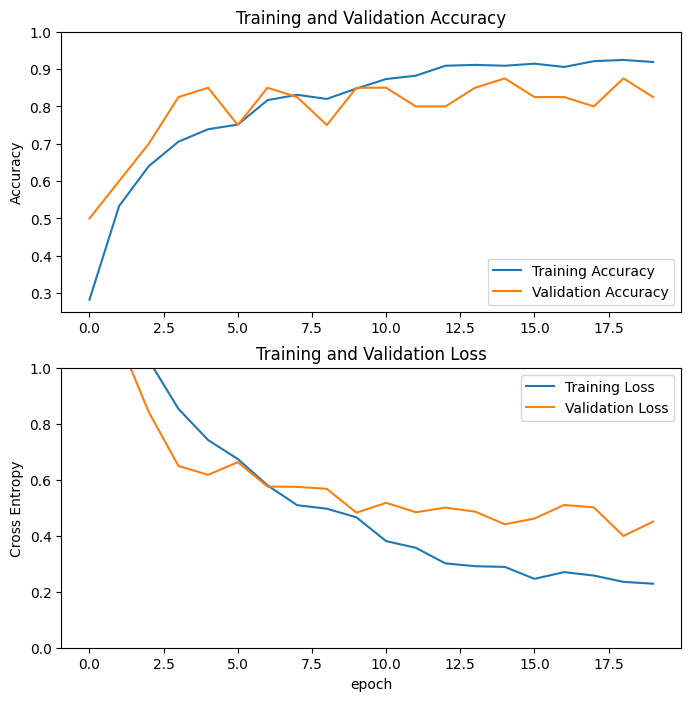

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

10/10 [==============================] - 2s 33ms/step


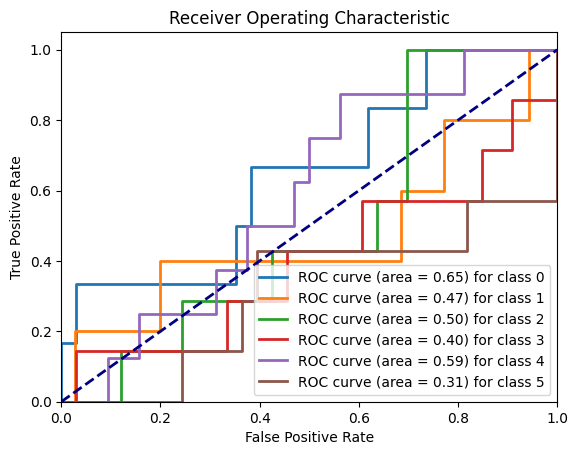

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Mengubah label ke format one-hot encoding
true_labels = label_binarize(validation_generator.classes, classes=np.arange(6))

preds = model.predict(validation_generator, verbose=1)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
  fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], preds[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
lw = 2

for i in range(6):
  plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 5. Testing Pada Images

Saving 18.jpg to 18.jpg


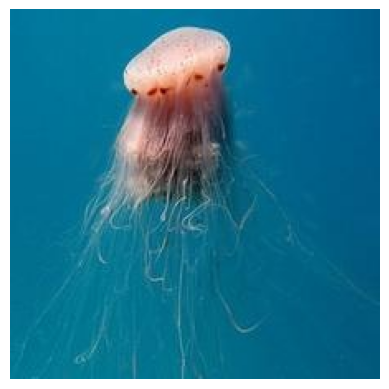

1/1 [==============================] - 2s 2s/step

Ini adalah Lions Mane Jelly Fish


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()


for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)

  plt.imshow(x/255.)
  plt.axis('off')
  plt.show()

  x = np.expand_dims(x, axis=0)

  classes = model.predict(x)

  # Menggunakan argmax untuk menentukan kelas yang memiliki probabilitas tertinggi
  predicted_class = np.argmax(classes)

  if predicted_class == 0:
    print("\nIni adalah Moon Jelly Fish")
  elif predicted_class == 1:
    print("\nIni adalah Barrel Jelly Fish")
  elif predicted_class == 2:
    print("\nIni adalah Blue Jelly Fish")
  elif predicted_class == 3:
    print("\nIni adalah Compass Jelly Fish")
  elif predicted_class == 4:
    print("\nIni adalah Lions Mane Jelly Fish")
  elif predicted_class == 5:
    print("\nIni adalah Mauve Stinger Jelly Fish")
  else:
    print("\nKelas tidak dikenali")